In [1]:
from mlxtend.frequent_patterns import fpgrowth
from mlxtend.frequent_patterns import association_rules

import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
df = pd.read_csv('Masipalingwangi.csv')
#(df.head(100))
df



,area,id_retail,id_depo,order_date,order_no,id_produk,katagori,qty_sales_order,amount_sales_order,kabupaten
0,JAWA TIMUR,C100292760,G00129,2022-01-01,SO2201000002373440,SM0307,Makanan Kemasan,1,17500,Kabupaten Malang
1,JAWA TIMUR,C100299573,G00129,2022-01-01,SO2201000002373682,TPP00008,Makanan Kemasan,2,30000,Kabupaten Malang
2,JAWA TIMUR,C100148733,G00129,2022-01-01,SO2201000002373449,V0072,Makanan Ringan,1,25500,Kabupaten Malang
3,JAWA TIMUR,C100292760,G00129,2022-01-01,SO2201000002373440,3206025,Makanan Ringan,1,10500,Kabupaten Malang
4,JAWA TIMUR,C100292760,G00129,2022-01-01,SO2201000002373440,SM0029,Makanan Ringan,1,26500,Kabupaten Malang
...,...,...,...,...,...,...,...,...,...,...
686023,JAWA TIMUR,C100040387,G01169,2022-12-28,SO2212000004252616,461186,Sembako,3,81000,Kabupaten Situbondo
686024,JAWA TIMUR,C100140829,G01169,2022-12-28,SO2212000004253546,SM00000991,Sembako,6,31500,Kabupaten Situbondo
686025,JAWA TIMUR,C100140829,G01169,2022-12-28,SO2212000004253546,SM00000992,Sembako,5,5000,Kabupaten Situbondo
686026,JAWA TIMUR,C100146400,G01169,2022-12-28,SO2212000004250981,000320,Sembako,3,13950,Kabupaten Situbondo


In [2]:
df[~df['id_produk'].str.isnumeric()]['id_produk'].unique

<bound method Series.unique of 0                       SM0307
1                     TPP00008
2                        V0072
4                       SM0029
5                       SM0582
                  ...         
686016               PDU006561
686017               PDU006561
686021    SM00010167          
686024    SM00000991          
686025    SM00000992          
Name: id_produk, Length: 296833, dtype: object>

In [3]:
df['katagori']

0         Makanan Kemasan
1         Makanan Kemasan
2          Makanan Ringan
3          Makanan Ringan
4          Makanan Ringan
               ...       
686023            Sembako
686024            Sembako
686025            Sembako
686026            Sembako
686027            Sembako
Name: katagori, Length: 686028, dtype: object

In [4]:
df.groupby('katagori').sum('qty_sales_order')['qty_sales_order']

katagori
Alat Tulis dan Perlengkapan Kantor       4704
Makanan Kemasan                         36734
Makanan Ringan                         769060
Minuman                               1235220
Obat-Obatan                             57232
Perlengkapan Rumah Tangga              451423
Permen dan Coklat                       71554
Produk Kebutuhan Bayi                   73003
Produk Kopi                            198506
Produk Mie Instan                     1420812
Produk Perawatan Tubuh                 116521
Rokok                                 1440015
Sembako                               1039666
Susu                                   102472
Name: qty_sales_order, dtype: int64

<AxesSubplot: xlabel='katagori'>

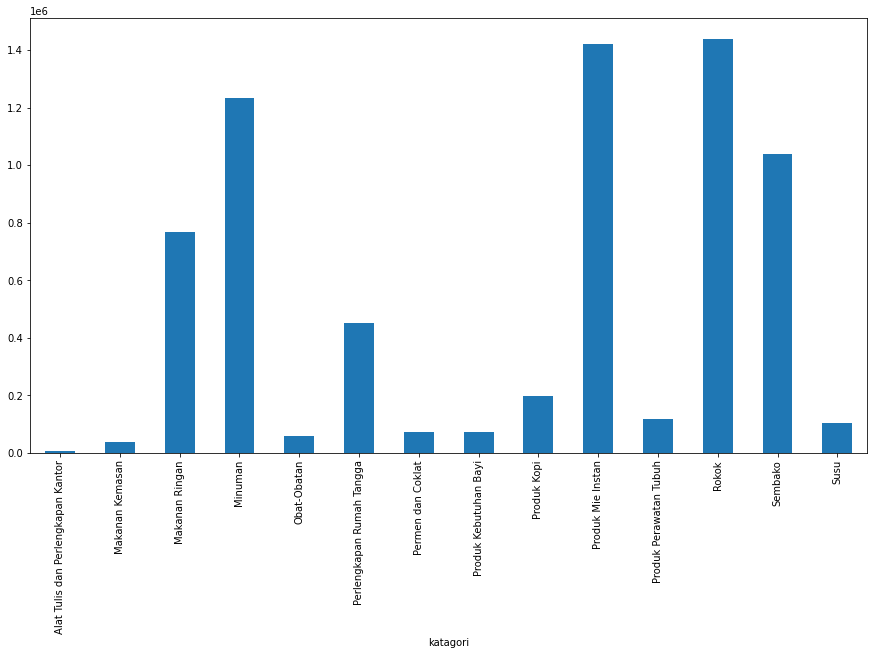

In [5]:
df.groupby('katagori').sum('qty_sales_order')['qty_sales_order'].plot(kind='bar', figsize=(15,8))

<AxesSubplot: ylabel='qty_sales_order'>

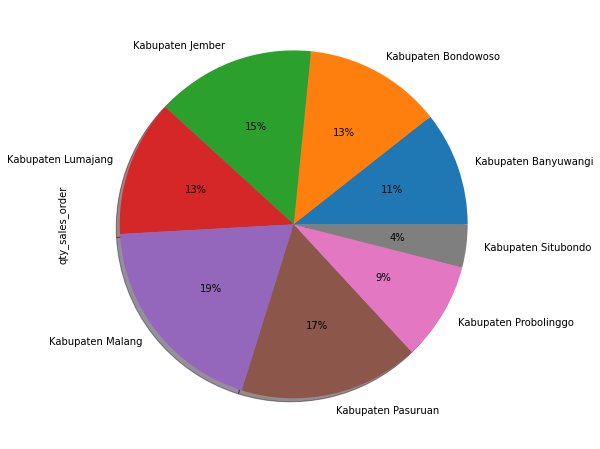

In [5]:
df.groupby('kabupaten').sum('qty_sales_order')['qty_sales_order'].plot(kind='pie', figsize=(15,8),shadow=True,autopct='%1.0f%%')

In [7]:
df.groupby('kabupaten').sum('qty_sales_order').reset_index()['kabupaten'].tolist()

['Kabupaten Banyuwangi',
 'Kabupaten Bondowoso',
 'Kabupaten Jember',
 'Kabupaten Lumajang',
 'Kabupaten Malang',
 'Kabupaten Pasuruan',
 'Kabupaten Probolinggo',
 'Kabupaten Situbondo']

In [8]:
df['id_produk'].count()

686028

In [2]:
import random
from BatAlgorithm import *

In [93]:
import faker

ModuleNotFoundError: No module named 'faker'

In [ ]:
df_result = df.desc

In [7]:
df_result = df.groupby(['order_no', 'id_produk']).agg(order=('id_produk', 'count')).reset_index()

df_result

,order_no,id_produk,order
0,SO2201000002373401,003000,1
1,SO2201000002373401,2903074,1
2,SO2201000002373401,PR0251,1
3,SO2201000002373401,PR0262,1
4,SO2201000002373401,PR0591,1
...,...,...,...
686023,SO2212000004274428,PR02665,1
686024,SO2212000004274428,PR027018,1
686025,SO2212000004274428,PR02705,1
686026,SO2212000004274428,PR0308,1


In [8]:
# Mengubah DataFrame menjadi list dari transaksi
transactions = df_result.groupby('order_no')['id_produk'].apply(list).tolist()

In [9]:
# Melakukan one-hot encoding pada transaksi
te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
df_encoded = pd.DataFrame(te_ary, columns=te.columns_)
df_encoded

,000000065,000000098765,000002,000004,000006,000008,00000987,000011,0000124,000023,...,v0503,v0703,v0777,v0928,v0929,v0930,v0935,v10021,valensia800,wedangjahemerah
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69551,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
69552,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
69553,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
69554,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [9]:
import random
from BatAlgorithm import *

In [10]:
df_encoded

,000000065,000000098765,000002,000004,000006,000008,00000987,000011,0000124,000023,...,v0503,v0703,v0777,v0928,v0929,v0930,v0935,v10021,valensia800,wedangjahemerah
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69551,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
69552,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
69553,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
69554,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [58]:
def Fun(D, sol):
    val = 0.0
    for i in range(D):
        val = val + sol[i] * sol[i]
    return val

In [11]:
lower_bound = np.array([0.06, 0.85])  
upper_bound = np.array([1.5, 1.9])  

In [12]:
bat_algorithm = BatAlgorithm(D=1, A=0.5,r=0.5,N_Gen=100,NP=20, Lower=lower_bound,Qmax=1.5,Qmin=0.0, Upper=upper_bound,function=Fun)

NameError: name 'Fun' is not defined

In [13]:
bat_algorithm.move_bat()
best_solution = bat_algorithm.get_global_best()
# best_fitness = ObjectFunction(best_solution)
best_solution

NameError: name 'bat_algorithm' is not defined

In [106]:
cth = np.random.uniform([1,0.3], [5,1.2], (10, 2))
cth

array([[2.69768939, 0.79555264],
       [4.71422646, 0.35230182],
       [4.19958706, 0.36788574],
       [4.42691977, 0.37062892],
       [1.45688478, 1.04160668],
       [2.17723648, 0.52565413],
       [2.3334159 , 0.63309726],
       [3.31761126, 0.7679978 ],
       [1.79507111, 0.6614992 ],
       [1.72152729, 1.06818652]])

In [127]:
np.random.random()

0.5083254031144093

In [13]:
fp= fpgrowth(df_encoded, min_support=0.2, use_colnames=True)
fp

,support,itemsets
0,0.298191,(PDU000072)


In [179]:
# buat object function untuk algorithma fp-growth

def ObjectFunction2(params,df_trans):
    min_support = params[0] 
    min_confidence = params[1]
   
    frequent_patterns= fpgrowth(df_trans, min_support=min_support, use_colnames=True)
    if frequent_patterns.empty:
        return 0
    rule_ = association_rules(frequent_patterns, metric="confidence", min_threshold= min_confidence)
    
    return  rule_['confidence'].mean() /rule_['support'].mean()

In [64]:
def bat_algorithm(num_bats, num_iterations,df_masuk):
    # Inisialisasi parameter Bat Algorithm
    num_dimensions = 2  # Jumlah parameter yang ingin dioptimalkan (min_support, min_confidence)
    lower_bound = np.array([0.01, 0.25])  # Batas bawah untuk setiap parameter
    upper_bound = np.array([0.9, 0.98])  # Batas atas untuk setiap parameter
    loudness = 0.5  # Inisialisasi nilai loudness
    pulse_rate = 0.3  # Inisialisasi nilai pulse rate
    lower_freq = 0.2983
    highest_freq = 0.923

    # Inisialisasi posisi kelelawar secara acak di dalam batas pencarian
    bats = np.random.uniform(lower_bound, upper_bound, (num_bats, num_dimensions))
    # Inisialisasi kecepatan dan posisi awal
    velocities = np.zeros((num_bats, num_dimensions))
    frequencies = np.zeros(num_bats)

    # Inisialisasi posisi terbaik
    best_solution_index = 0
    best_solution = bats[best_solution_index]

    # Iterasi Bat Algorithm
    for _ in range(num_iterations):
        # Update posisi kelelawar
        for i in range(num_bats):
            # Pembaruan frekuensi dan posisi berdasarkan pulsasi
            # if np.random.random() > frequencies[i]:
                # velocities[i] += (bats[i] - bats.mean(axis=0)) * loudness
                # frequencies[i] = pulse_rate * (1 - np.exp(-1 * np.random.random()))  # Update frekuensi
            frequencies[i] = lower_freq + (highest_freq - lower_freq) * np.random.uniform(0,1)
            velocities[i] = velocities[i] + (bats[i] - best_solution) * frequencies[i]

            if np.random.random() > pulse_rate:
                alpha = 0.03
                bats[i] = best_solution + alpha * np.random.uniform(0,1)



            # Batasan posisi kelelawar dalam batas pencarian
            bats[i] = np.clip(bats[i] + velocities[i], lower_bound, upper_bound)

        # Evaluasi setiap kelelawar
        for i in range(num_bats):
            current_evaluation = ObjectFunction(bats[i],df_masuk)
            # Jika nilai evaluasi lebih baik, update posisi terbaik
            if current_evaluation > ObjectFunction(best_solution,df_masuk):
                best_solution = bats[i]

    # Mengembalikan posisi terbaik (parameter yang dioptimalkan)
    return {'best': best_solution,'bats' : bats}

In [180]:
def bat_algorithm2(num_bats, num_iterations,lower_sup,upper_sup,lower_conf,upper_conf,loudness,pulse_rate,df_masuk):
        # Inisialisasi parameter Bat Algorithm
        num_dimensions = 2  # Jumlah parameter yang ingin dioptimalkan (min_support, min_confidence)
        lower_bound = np.array([float(lower_sup), float(lower_conf)])  # Batas bawah untuk setiap parameter
        upper_bound = np.array([float(upper_sup), float(upper_conf)])  # Batas atas untuk setiap parameter
        loudness = float(loudness)  # Inisialisasi nilai loudness
        pulse_rate = float(pulse_rate)  # Inisialisasi nilai pulse rate
        lower_freq = 0.0002983
        highest_freq = 0.000923
        bat_func= []
        trigerred1 = 0
        trigerred2 = 0


        # Inisialisasi posisi kelelawar secara acak di dalam batas pencarian
        bats = np.random.uniform(lower_bound, upper_bound, (int(num_bats), num_dimensions))
        # Inisialisasi kecepatan dan posisi awal
        velocities = np.zeros((int(num_bats), num_dimensions))
        frequencies = np.zeros(int(num_bats))

        # Inisialisasi posisi terbaik
        best_solution_index = 0
        best_solution = [0,0]
        outputFunc = np.zeros(int(num_bats))

        # Iterasi Bat Algorithm
        for _ in range(int(num_iterations)):
            # Update posisi kelelawar
            for i in range(int(num_bats)):
                # Pembaruan frekuensi dan posisi berdasarkan pulsasi
                # if np.random.random() > frequencies[i]:
                    # velocities[i] += (bats[i] - bats.mean(axis=0)) * loudness
                    # frequencies[i] = pulse_rate * (1 - np.exp(-1 * np.random.random()))  # Update frekuensi
                frequencies[i] = lower_freq + (highest_freq - lower_freq) * np.random.random()
                velocities[i] = velocities[i] + (bats[i] - best_solution) * frequencies[i]
          
                

                if np.random.random() > float(pulse_rate):
                    alpha = 0.03
                    # bats[i] = best_solution + alpha * np.random.uniform(0,1,size=2)
                    bats[i] = best_solution + alpha * np.random.uniform(0,1,size=2)




                # Batasan posisi kelelawar dalam batas pencarian
                bats[i] = np.clip(bats[i] + velocities[i], lower_bound, upper_bound)
                
                Ftemp = ObjectFunction2(bats[i],df_masuk)
                print(Ftemp)
                if Ftemp > outputFunc[i] and np.random.rand() < loudness:
                    outputFunc[i] = ObjectFunction2(bats[i],df_masuk)
                    trigerred1+=1

                    
                    
                if Ftemp > max(outputFunc):
                    print('ke trigger cuk')
                    best_solution = bats[i]
                    trigerred2+=1

                
                bat_func.append({
                    'val' : bats[i],
                    'output' : float(Ftemp)
                })

            # Evaluasi setiap kelelawar
            # for i in range(int(num_bats)):
            #     current_evaluation = self.ObjectFunction(bats[i],df_masuk)
            #     self.bat_func.append({
            #         'val' : bats[i],
            #         'output' : current_evaluation
            #     })
            #     # Jika nilai evaluasi lebih baik, update posisi terbaik
            #     if current_evaluation > self.ObjectFunction(best_solution,df_masuk):
            #         best_solution = bats[i]

        # Mengembalikan posisi terbaik (parameter yang dioptimalkan)
                
                
        return {
                    'best' : best_solution,
                    'hist' : bats  ,
                    'batfunc' : bat_func ,
                    'triger' : trigerred1,
                    'triger2' : trigerred2
                }

In [69]:
df_input = df_encoded
df_input
best_parameters = bat_algorithm(5, 10,df_input)
print("Best Parameters (min_support, min_confidence):", best_parameters)

Best Parameters (min_support, min_confidence): {'best': array([0.01, 0.98]), 'bats': array([[0.9       , 0.58480723],
       [0.9       , 0.98      ],
       [0.29697482, 0.25      ],
       [0.01      , 0.98      ],
       [0.9       , 0.25      ]])}


In [181]:
a = bat_algorithm2(
    df_masuk=df_encoded,
    num_bats=5,
    num_iterations=5,
    lower_sup=0.01,
    upper_sup=1,
    lower_conf=0.4,
    upper_conf=0.9,
    loudness=0.2,
    pulse_rate=0.3
)

a

46.502572867954164
0
31.449871345944644
21.042941426221645
20.55135029463584
44.95882453972244
0
28.711165564758883
46.502572867954164
27.623993560580487
43.831011762764
0
46.502572867954164
21.296854743170382
29.924735368160043
34.515210819595815
30.026318550491172
35.50998795407589
37.19643771422756
43.19192337045438
24.071410628666776
22.10672174832557
35.426558643188734
27.148449027281572
36.73010073174896


{'best': [0, 0],
 'hist': array([[0.02582059, 0.4       ],
        [0.02821317, 0.4       ],
        [0.01432381, 0.40163545],
        [0.02243215, 0.4       ],
        [0.01361164, 0.4       ]]),
 'batfunc': [{'val': array([0.02582059, 0.4       ]),
   'output': 46.502572867954164},
  {'val': array([0.02821317, 0.4       ]), 'output': 0.0},
  {'val': array([0.01432381, 0.40163545]), 'output': 31.449871345944644},
  {'val': array([0.02243215, 0.4       ]), 'output': 21.042941426221645},
  {'val': array([0.01361164, 0.4       ]), 'output': 20.55135029463584},
  {'val': array([0.02582059, 0.4       ]), 'output': 44.95882453972244},
  {'val': array([0.02821317, 0.4       ]), 'output': 0.0},
  {'val': array([0.01432381, 0.40163545]), 'output': 28.711165564758883},
  {'val': array([0.02243215, 0.4       ]), 'output': 46.502572867954164},
  {'val': array([0.01361164, 0.4       ]), 'output': 27.623993560580487},
  {'val': array([0.02582059, 0.4       ]), 'output': 43.831011762764},
  {'val': 

In [170]:
46.502572867954164 > max([0,2,3,5,2,4,2,10,0,0])

True

In [187]:
tas[1] = 99

In [188]:
tas

[0, 99, 99, 9, 2, 4, 5, 2, 8]

In [106]:
b = [0,2] +( 0.03 * np.random.uniform(0,1,size=2))

In [107]:
b

array([0.01047459, 2.00654702])

In [46]:
df_encoded

,000000065,000000098765,000002,000004,000006,000008,00000987,000011,0000124,000023,...,v0503,v0703,v0777,v0928,v0929,v0930,v0935,v10021,valensia800,wedangjahemerah
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69551,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
69552,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
69553,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
69554,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [150]:
def ObjectFunction2(params,df_trans):
        min_support = params[0] 
        min_confidence = params[1]
    
        frequent_patterns= fpgrowth(df_trans, min_support=min_support, use_colnames=True)
        
        if frequent_patterns.empty:
            return 0
        rule_ = association_rules(frequent_patterns, metric="confidence", min_threshold= min_confidence)
        
        return  rule_['confidence'].mean() /rule_['support'].mean()

In [190]:

ObjectFunction2([0.017853145487942722,0.4],df_encoded)


30.600620570794337

In [191]:
len(df_encoded)

69556

In [148]:
# Menggunakan algoritma fpgrowth untuk mendapatkan frequent patterns
frequent_patterns= fpgrowth(df_encoded, min_support=0.01391203 , use_colnames=True)

rule_FPGROWTH = association_rules(frequent_patterns, metric="confidence", min_threshold= 0.64267996)
rule_FPGROWTH


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(TPP00010),(PDU000072),0.145624,0.298191,0.114498,0.786257,2.636754,0.071074,3.283427,0.726548
1,(TPP00010),(311111),0.145624,0.175413,0.097964,0.672722,3.835083,0.072420,2.519531,0.865250
2,"(PDU000072, TPP00010)",(311111),0.114498,0.175413,0.087469,0.763938,4.355090,0.067385,3.493093,0.869996
3,"(TPP00010, 311111)",(PDU000072),0.097964,0.298191,0.087469,0.892868,2.994277,0.058257,6.550855,0.738363
4,"(PDU000072, SM0029)",(TPP00010),0.023578,0.145624,0.015570,0.660366,4.534743,0.012137,2.515578,0.798303
...,...,...,...,...,...,...,...,...,...,...
165421,"(PDU000072, TPP00001, PDU005608)","(PDU006561, PDU008582)",0.032837,0.046366,0.026540,0.808231,17.431729,0.025017,4.972834,0.974637
165422,"(PDU006561, PDU000072, TPP00001)","(PDU008582, PDU005608)",0.037409,0.044252,0.026540,0.709454,16.032099,0.024884,3.289492,0.974064
165423,"(PDU006561, PDU005608, TPP00001)","(PDU008582, PDU000072)",0.030867,0.047113,0.026540,0.859804,18.249787,0.025086,6.796838,0.975310
165424,"(PDU008582, TPP00001)","(PDU006561, PDU000072, PDU005608)",0.040428,0.034102,0.026540,0.656472,19.250246,0.025161,2.811703,0.987995


In [55]:
rule_FPGROWTH['lift'].mean()

6.873964344835389

In [10]:
fpg = fpgrowth(df_encoded, min_support=0.01391203, use_colnames=True)

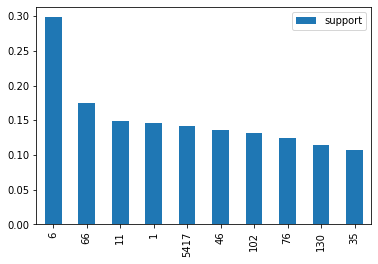

In [34]:
asd = fpg.sort_values(by='support',ascending=False).head(10).plot(kind='bar')

<AxesSubplot: >

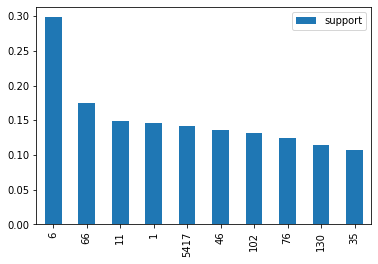

In [33]:
asd.plot(kind='bar')

In [18]:
fpg.plot().hist(x='itemsets',y='support')

(array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]),
 array([-0.5, -0.4, -0.3, -0.2, -0.1,  0. ,  0.1,  0.2,  0.3,  0.4,  0.5]),
 <BarContainer object of 10 artists>)

Error in callback <function _draw_all_if_interactive at 0x0000019DA287FC70> (for post_execute):


ConversionError: Failed to convert value(s) to axis units: 'support'

ConversionError: Failed to convert value(s) to axis units: 'support'

<Figure size 432x288 with 1 Axes>

In [56]:
rule_FPGROWTH['confidence'].mean() /rule_FPGROWTH['support'].mean()

12.40284683383135

In [87]:
# Menghitung rata-rata kolom 'lift'
rata_rata_lift = rule_FPGROWTH['lift'].mean()

# Menampilkan hasil
print("Rata-rata kolom 'lift':", rata_rata_lift)

Rata-rata kolom 'lift': 6.873964344835389


In [89]:
# Menyimpan aturan asosiasi ke dalam file Excel
rule_FPGROWTH.to_excel(r'hasil_rule_FP Growth_0.05_0.6.xlsx', index=False)

print ('selesai')


selesai


In [73]:
# Cara menghitung catatan waktu proses asosiasi
import time 
start_time = time.time()

frequent_patterns= fpgrowth(df_encoded, min_support=0.01, use_colnames=True)
rule_FPGROWTH = association_rules(frequent_patterns, metric="confidence", min_threshold= 0.2)
rule_FPGROWTH

elapsed_FpGrowth = time.time() - start_time
elapsed_FpGrowth
print ("Catatan Waktu : ",elapsed_FpGrowth)


Catatan Waktu :  12.645538091659546


In [37]:
rule_FPGROWTH


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,"(2903074, PDU000072)",(310837),0.027776,0.136422,0.012910,0.464803,3.407088,0.009121,1.613570,0.726679
1,"(2903074, 310837)",(PDU000072),0.029300,0.298191,0.012910,0.440628,1.477669,0.004173,1.254637,0.333016
2,"(2903074, 000849)",(310837),0.025505,0.136422,0.011070,0.434047,3.181642,0.007591,1.525883,0.703643
3,(TPP00010),(PDU000072),0.145624,0.298191,0.114498,0.786257,2.636754,0.071074,3.283427,0.726548
4,(TPP00010),(311111),0.145624,0.175413,0.097964,0.672722,3.835083,0.072420,2.519531,0.865250
...,...,...,...,...,...,...,...,...,...,...
922146,"(PDU006561, PDU000072)","(PDU008582, PDU005608, TPP00001)",0.046811,0.031457,0.026540,0.566953,18.023311,0.025067,2.236579,0.990902
922147,"(PDU006561, PDU005608)","(PDU008582, PDU000072, TPP00001)",0.042987,0.037078,0.026540,0.617391,16.651132,0.024946,2.516728,0.982164
922148,"(PDU005608, TPP00001)","(PDU006561, PDU008582, PDU000072)",0.037107,0.037955,0.026540,0.715227,18.844055,0.025131,3.378283,0.983425
922149,"(PDU006561, TPP00001)","(PDU008582, PDU000072, PDU005608)",0.041679,0.034965,0.026540,0.636771,18.211869,0.025082,2.656826,0.986194
